In [74]:
import os
import time
import tweepy
import random
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_dotenv()
auth = tweepy.OAuthHandler(os.getenv('API_KEY'), os.getenv('SECRET_KEY'))
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [3]:
ids = open('followers.txt', 'r').read().split('\n')

Tamaño de la muestra:

$$n = \frac{N Z_a^2 pq}{d^2(N-1)Z_a^2 pq}$$

Donde:

- $N$: Tamaño de la población
- $Z$: Nivel de confianza
- $d$: Error admisible

In [13]:
n = (len(ids) * 1.96 ** 2 * 0.5 * 0.5) / (0.03 ** 2 * (len(ids) - 1) * 1.96 ** 2 * 0.5 * 0.5)
n

1111.1124030977705

In [14]:
random.seed(30)
sample = random.sample(ids, 1200)

In [44]:
users = []
for user_id in sample:
    user = api.get_user(user_id)
    u = {
        'created_at' : user.created_at,
        'description' : user.description,
        'favorites_count': user.favourites_count,
        'followers_count': user.followers_count,
        'friends_count': user.friends_count,
        'listed_count': user.listed_count,
        'location': user.location,
        'name': user.name,
        'screen_name': user.screen_name,
        'url': user.url
    }
    users.append(u)

Rate limit reached. Sleeping for: 531
Rate limit reached. Sleeping for: 619


In [45]:
df = pd.DataFrame(users)

In [46]:
df.head()

,created_at,description,favorites_count,followers_count,friends_count,listed_count,location,name,screen_name,url
0,2013-11-10 03:12:18,La Ceiba 0101\n🌴 Honduras 🇭🇳 504\nCatracha \n🙋...,231,79,333,0,Mi bbpin: 79639917,Michelle Mendoza,Mimendozas,None
1,2011-06-12 20:41:50,,109,31,150,1,El Salvador,Emanuel Moncada,EmanuelMoncada,None
2,2019-04-02 03:39:29,,61,1,67,0,,Maby,MabyMazariegosf,None
3,2015-04-14 00:38:09,,8,31,462,0,,Adriana Mochez,AMochez,None
4,2012-09-08 23:16:36,,36,1,329,0,"Heredia, Costa Rica",Daniel Zuniga,danielzch15,None


In [47]:
df.to_csv('sample.csv', index=False)

In [65]:
df['month'] = df['created_at'].apply(lambda x: str(x.year) + '-' + str(x.month).rjust(2, '0'))
df['year'] = df['created_at'].apply(lambda x: str(x.year))

In [88]:
by_month = df.groupby('month').count()['name'] / 12
by_year = df.groupby('year').count()['name'] / 12

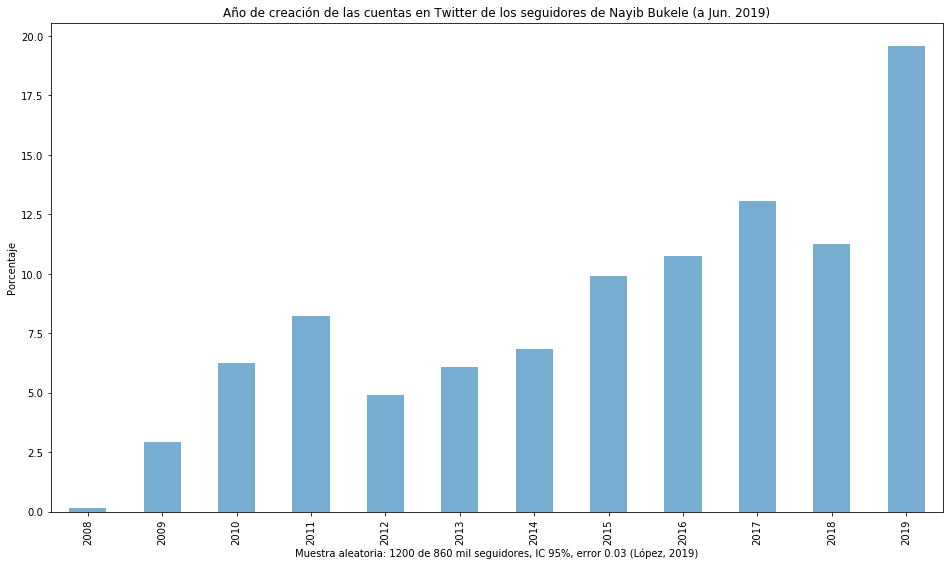

In [100]:
plt.figure(figsize=(16,9))
by_year.plot(kind='bar', alpha=0.6)
plt.title('Año de creación de las cuentas en Twitter de los seguidores de Nayib Bukele (a Jun. 2019)')
plt.ylabel('Porcentaje')
plt.xlabel('Muestra aleatoria: 1200 de 860 mil seguidores, IC 95%, error 0.03 (López, 2019)')
plt.savefig('bukele_followers_created_at.png')

In [68]:
by_year.sum()

1200

In [101]:
by_year

year
2008     0.166667
2009     2.916667
2010     6.250000
2011     8.250000
2012     4.916667
2013     6.083333
2014     6.833333
2015     9.916667
2016    10.750000
2017    13.083333
2018    11.250000
2019    19.583333
Name: name, dtype: float64

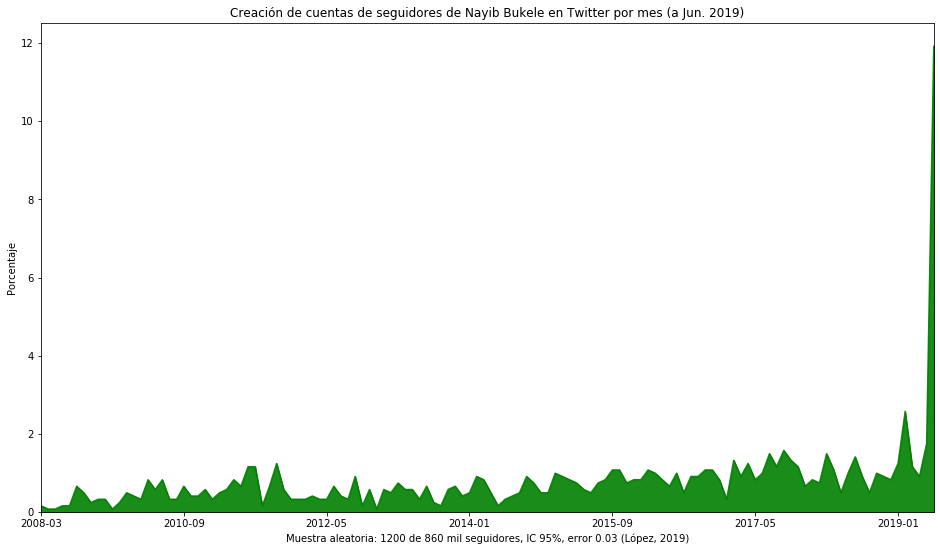

In [109]:
plt.figure(figsize=(16,9))
by_month.plot(kind='area', color='green', alpha=0.9)
plt.title('Creación de cuentas de seguidores de Nayib Bukele en Twitter por mes (a Jun. 2019)')
plt.ylabel('Porcentaje')
plt.xlabel('Muestra aleatoria: 1200 de 860 mil seguidores, IC 95%, error 0.03 (López, 2019)')
plt.savefig('bukele_followers_created_at.png')

In [103]:
by_month

month
2008-03     0.166667
2009-01     0.083333
2009-03     0.083333
2009-04     0.166667
2009-05     0.166667
2009-06     0.666667
2009-07     0.500000
2009-08     0.250000
2009-09     0.333333
2009-10     0.333333
2009-11     0.083333
2009-12     0.250000
2010-01     0.500000
2010-02     0.416667
2010-03     0.333333
2010-04     0.833333
2010-05     0.583333
2010-06     0.833333
2010-07     0.333333
2010-08     0.333333
2010-09     0.666667
2010-10     0.416667
2010-11     0.416667
2010-12     0.583333
2011-01     0.333333
2011-02     0.500000
2011-03     0.583333
2011-04     0.833333
2011-05     0.666667
2011-06     1.166667
             ...    
2017-01     0.333333
2017-02     1.333333
2017-03     0.916667
2017-04     1.250000
2017-05     0.833333
2017-06     1.000000
2017-07     1.500000
2017-08     1.166667
2017-09     1.583333
2017-10     1.333333
2017-11     1.166667
2017-12     0.666667
2018-01     0.833333
2018-02     0.750000
2018-03     1.500000
2018-04     1.083333
2018-05